**Before Starting**: First, fill out the below code cell with your first name, last name, and student ID.

**Before Submission**: Make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).


**During Lab Tips**:
1. DO NOT write your written responses in the same markdown cell as the question. If you do this, your written response will be lost!


2. If possible, please try to use your local Jupyter Notebook to complete the lab. Online notebook editors like Collab can edit notebook source code and cause our auto-grader to break, making grading your lab more difficult for us!

**<font color='red'>WARNING: Some TODOs have `todo_check()` functions which will give you a rough estimate of whether you will recieve points or not. <u>These checks are there simply to make sure you are on the right track and they DO NOT determine your final grade for the lab</u>. They are only here to provide you with real-time feedback.</font>**

In [2]:
FIRST_NAME = "Adam"
LAST_NAME = "Nur"
STUDENT_ID = "801286783"

---



# Linear Classification Lab

### ITCS 5156:  Applied Machine Learning 
### Minwoo "Jake" Lee

In [1]:
# Extra imports for this lab that are beyond the scope of discussion
import os
import gc
import traceback
import warnings
from pdb import set_trace

# Set this to True if you DO NOT want to run the 
# garbage_collect() functions throughout the notebook
turn_off_garbage_collect = False

def garbage_collect(vars_):
    if not turn_off_garbage_collect:
        for v in vars_:
            if v in globals():
                del globals()[v]
        collected = gc.collect()

        
class TodoCheckFailed(Exception):
    pass

def todo_check(asserts):
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    print("Your code PASSED the code check!")

# Goal 

The goal of this activity is to make you more familiar with Scikit.Learn and practice linear classification models with it. You will apply Ridge Classifier, SGD, Perceptron, SVM, Logistic Regression, kNN, and Naive Bayes to real data. We will prepare data as we did in last week's practice and then apply these linear classification models. Follow the TODO titles and comments to finish the activity!

# Agenda

* Iris data breakdown
* Iris data visualization 
* Breast cancer data breakdown/visualization
* Classification with
  * Ridge Classifier
  * SGD
  * Perceptron
  * SVM
  * Logistic Regression
  * kNN
  * Naive Bayes
* Multi-class classification with One vs Rest 
  

# Tables of TODO's


1. [TODO1 (6 points)](#TODO1) 
2. [TODO2 (10 points)](#TODO2) 
3. [TODO3 (8 points)](#TODO3) 
4. [TODO4 (3 points)](#TODO4) 
5. [TODO5 (4 points)](#TODO5) 
6. [TODO6 (7 points)](#TODO6) 
7. [TODO7 (7 points)](#TODO7) 
8. [TODO8 (18 points)](#TODO8) 
9. [TODO9 (12 points)](#TODO9) 
10. [TODO10 (22 points)](#TODO10) 
11. [Extra Credit (15 points)](#TODO_EXTRA)
12. [Feedback (3 points)](#feedback)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy as copy

%matplotlib inline

# Classification


# Data Visualization
## Iris dataset breakdown
The data we are going to be using for this lab is the famous iris dataset. This dataset is a frequently used dataset when first being introduced to classification in machine learning. Famous datasets like this can often be found within machine learning packages, meaning all you have to do is import the dataset via a given package. For instance, Scikit Learn (sklearn) already has the iris dataset built into its library. All we need to do is simply import it! 

If you are not familiar to the iris dataset try reading up on it on the UCI website: https://archive.ics.uci.edu/ml/datasets/iris.

Let's import the iris dataset using the imported `load_iris()` function and store the output into a variable called `iris`.

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

Next, let's check the data structure type of the our `iris` variable so we know how to manipulate our data. To do so we can use Pythons built-in function `type()`.

In [5]:
type(iris)

sklearn.utils._bunch.Bunch

Hmmm, I don't think we have seen the type `sklearn.utils.Bunch` before. Let's quickly check the output of the `iris` variable. Here we can see the `iris` prints out keys and corresponding data or meta-data (information about our data) for each key.

In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

So, it looks our `iris` variable is an instance of a sklearn object which holds the data and meta-data. No worries, after a little research it looks like we can access our data by accessing the instance variables inside the `iris` instance. It turns out each key seen in the above output is actually an instance variable. Let's remember what the keys of the `iris` instance are by calling `iris.keys()` instead of manually going through the large output above.

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Okay, now we can clearly see the keys. These key are actually the names of instance variables which hold data or meta-data. Let's try accessing this data and meta-data.

We can access the 'data' key of `iris` by treating the it as an instance variable. The following code does this by calling the instance `iris` and adding a dot `.` followed by the instance variable name, in this case `data`. 

In [8]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Let's check the data structure type of `iris.data`.

In [9]:
type(iris.data)

numpy.ndarray

Hey, look at that! `iris.data` returns the data in the form of a Numpy array. This means we can manipulate this data just like we have in previous labs! Now that we know that `iris.data` is a Numpy array let's check the shape of our data.

In [10]:
iris.data.shape

(150, 4)

Nice, we can see we have 150 data samples (rows) and 4 features (columns). 

Let's now check the labels of our features (columns). 

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Here can see the feature names, where each feature name represents the name of a column in the `iris.data` output. For instance, the first column `iris.data[0]` corresponds to 'sepal length' while the second column  `iris.data[1]` corresponds to `sepal width`. 

Finally, let's take a look at the target data.

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Ah, here we can see the targets for each of our data samples (rows). It seems that there are 3 classes: 0, 1, and 2. 

Let's next check the data structure type of `iris.target` to make sure it is a Numpy array as well.

In [13]:
type(iris.target)

numpy.ndarray

Awesome, `iris.target` is also a Numpy array. 

Let's next check the number of samples our target `iris.target` has to make sure it matches the number of samples in our data `iris.data`.

In [14]:
iris.target.shape

(150,)

As excepted, `iris.target` does contain the same number of samples. 

The final question is what do the three classes represent? Let's check by accessing the instance variable `target_names` which should tell us the actual names of the targets/classes.

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

There we go, we can see that each class corresponds to a type of flower - as might have been suspected by the name of the dataset! We can see that class 0 corresponds to 'setosa', class 1 corresponds to 'versicolor', and class 2 corresponds to 'virginica'.

Thus, our goal for this dataset will be to classify a data sample based on the 4 features 'sepal length', 'sepal width', 'petal length', 'petal width' into one of the three classes, 'setosa', 'versicolor', 'virginica'!

## Visualization
Now it's time to do some quick visualization to get a better feel for the iris data.

Let's store the iris data into variables to shorten our typing labor. 

In [16]:
X = iris.data
T = iris.target

Just like any visualization we want to see how the features relate to one another. In our case we want to see how the features relate to one anther and how they vary across classes! To do so lets first plot how our sepal features, 'sepal length' and 'sepal width', and observe how they relate. 

Take a second to review the code. You will need to understand it to complete the next TODO!

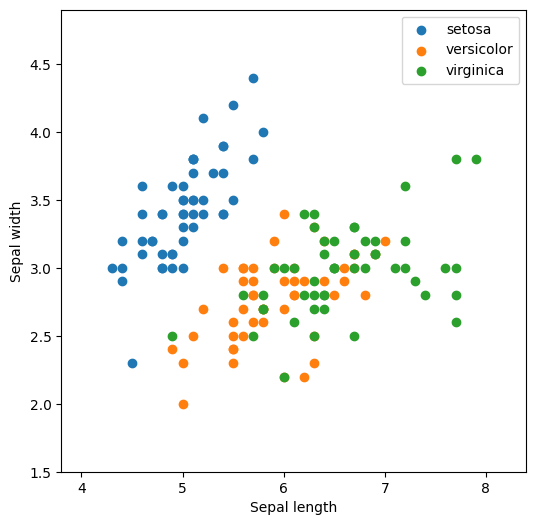

In [17]:
"""
http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

Code source: Gaël Varoquaux
Modified for documentation by Jaques Grobler
License: BSD 3 clause
"""
# Get row locations for each class
setosa_locs = np.where(T == 0)[0].astype(int)
versicolor_locs = np.where(T == 1)[0]
virginica_locs = np.where(T == 2)[0]

# Find min and max x-y coordiantes
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(figsize=(6,6))

# Plot the training points
plt.scatter(X[setosa_locs, 0], X[setosa_locs, 1], label='setosa')
plt.scatter(X[versicolor_locs, 0], X[versicolor_locs, 1], label='versicolor')
plt.scatter(X[virginica_locs, 0], X[virginica_locs, 1], label='virginica')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend() # Plots legend
plt.show()

Interesting! Here we can see that the setosa flower sepal width and length are quite distinguishable from the rest of the classes. It also looks like setosa has a nice linear pattern when it comes to its sepal width and length. Meaning, as the sepal length grows so does the sepal width, typically. On the other hand, the versicolor and virginica flowers sepal features seem to be quite intertwined and more chaotic.

Now, let's see how the petal features relate within and between classes.

<div id="TODO1"></div>

### TODO1
1. Just like above, plot each class but now with respect to petal length (the 3rd feature) and petal width (the 4th feature).
    1. Hint: Reuse the three `plt.scatter()` lines from above but now simply change which columns are being indexed!
2. Take a look at the two figures. What do you notice? Do any of the classes seem separable based on certain features?

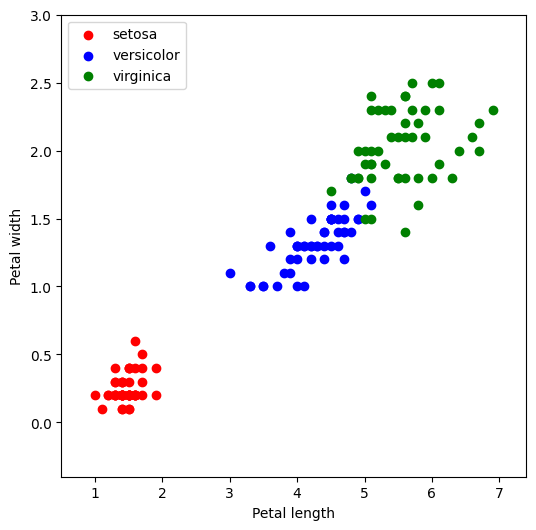

In [21]:
# Find min and max x-y coordiantes
x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5
y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5

plt.figure(figsize=(6,6))

# TODO 1-1

plt.scatter(X[T == 0, 2], X[T == 0, 3], c='red', label=iris.target_names[0])
plt.scatter(X[T == 1, 2], X[T == 1, 3], c='blue', label=iris.target_names[1])
plt.scatter(X[T == 2, 2], X[T == 2, 3], c='green', label=iris.target_names[2])

plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()
plt.show()


`TODO 1-2` Take a look at the two figures. What do you notice? Do any of the classes seem separable based on certain features? Add answer in the below markdown cell.

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`Answer:` Setosa stands out from both Versicolor and Virginica based on petal size. Versicolor and Virginica alsoshow some overlap 


## Breast Cancer Wisconsin dataset breakdown

Another popular classification data is breast cancer dataset from Clinical Sciences Center, Madison, WI. The computed features from a disgitized image of a fine needle aspirate (FNA) of a breast mass include radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. You can acces the detailed description and relevant papers from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). 

Scikit Learn (sklearn) has the brest cancer dataset built into its library, so you don't need to download the file. 

<div id="TODO2"></div>

### TODO 2-1 

1. Using `load_breast_cancer()` function in Scikit-Learn, load the data into `cancer`.
    1. Hint: Feel free to import the function or call it directly from `sklearn`.

2. Create a pandas DataFrame that contain both `cancer.data` and `cancer.target` with a proper column names and store to `df_breast`.
  1. HINT: use `np.hstack` to combine the arrays and then convert the stacked data into a DataFrame.


In [28]:
from sklearn.datasets import load_breast_cancer

# TODO 2-1.1
cancer = load_breast_cancer()

# TODO 2-1.2
data_with_target = np.hstack((cancer.data, cancer.target.reshape(-1, 1)))
column_names = list(cancer.feature_names) + ['diagnosis']

df_breast = pd.DataFrame(data_with_target, columns=column_names)


display(df_breast.head(5))

print(f"Target Names: {cancer.target_names} Target Labels: { np.unique(cancer.target)}")

mean radius  mean texture  mean perimeter  mean area  mean smoothness   
0        17.99         10.38          122.80     1001.0          0.11840  \
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry   
0           0.27760          0.3001              0.14710         0.2419  \
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area   
0                 0.07871  ...          17.33           184.60      2019.0  \
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points   
0            0.1622             0.6656           0.7119                0.2654  \
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  diagnosis  
0          0.4601                  0.11890        0.0  
1          0.2750                  0.08902        0.0  
2          0.3613                  0.08758        0.0  
3          0.6638                  0.17300        0.0  
4          0.2364                  0.07678        0.0  

[5 rows x 31 columns]

Target Names: ['malignant' 'benign'] Target Labels: [0 1]


In [29]:
todo_check([
    ("df_breast.shape == (569,31)", "`df_breast` has the wrong shape"),
    ("list(df_breast.columns.values[[0,10,20]]) == ['mean radius', 'radius error', 'worst radius']", "`df_breast` is missing column names"),
    ("'diagnosis' in df_breast.columns", "target 'diagnosis' is not in df_breast")
])

Your code PASSED the code check!




Skewness measures the symmetry of the distributions. Last week, we observed the skewed target label distributions in the forest fire dataset. Well, we may check skewness of our data as it reveals how the data is sampled. Moreover, linear models learn based on the assumption of similar distributions between input and target.   
You can learn about skewness of a distribution from [here](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/). 

Here are how to read the numbers from skewness values:
* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
* If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
* If the skewness is less than -1 or greater than 1, the data are highly skewed

### TODO 2-2

1. Using Pandas `describe()` method to take a look at the summary of `df_breast`. Store the output into `dfb_describe`.
2. Using Pandas `skew()` method to take a look at the skewness of `df_breast`. Store the output into `dfb_skew`.
3. What do you observe when looking at data summary and skewness measures? 


In [31]:
# TODO 2-2.1
dfb_describe = df_breast.describe()
dfb_describe

mean radius  mean texture  mean perimeter    mean area   
count   569.000000    569.000000      569.000000   569.000000  \
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points   
count       569.000000        569.000000      569.000000           569.000000  \
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture   
count     569.000000              569.000000  ...     569.000000  \
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness   
count       569.000000   569.000000        569.000000         569.000000  \
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry   
count       569.000000            569.000000      569.000000  \
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension   diagnosis  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [32]:
# TODO 2-2.2
dfb_skew = df_breast.skew()
dfb_skew

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

In [33]:
todo_check([
    ("dfb_describe.shape == (8,31)", "dfb_describe has the wrong shape."),
    ("np.all(np.isclose(np.diag(dfb_describe)[[0, 2, 3]], np.array([569.        ,  24.29898104, 143.5       ])))", 
     "dfb_describe values are incorrect."),
    ("np.all(np.isclose(dfb_skew.values[[0, 2, 3]], np.array([0.94237957, 0.99065043, 1.64573218])))", "dfb_skew has incorrect values")
])

Your code PASSED the code check!


`TODO 2-2.3` What do you observe when looking at data summary and skewness measures? 

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**


`Answer:` mean area values are much larger compared to mean smoothness.Mean area (skew = 1.645732), Area error (skew = 5.447186), and Concavity error (skew = 5.110463) have very positive skewness. 


In [34]:
n_pos = np.sum(cancer.target==1)
n_neg = len(cancer.target) - n_pos 
print("# pos: {}, # neg: {}".format(n_pos, n_neg))

# pos: 357, # neg: 212


In [35]:
garbage_collect(['dfb_skew', 'dfb_describe'])

## Visualization

The breast cancer data is high dimensional, which can be disasterous for data visualization.  

<div id="TODO3"></div>

### TODO 3-1

1. Using `df_breast` and the Pandas `scatter_matrix()` function, create a scatter plot using the all 31 features from the `df_breast` dataframe.
    1. Tip: By setting the `c` argument for `scatter_matrix()` equal to the targets, you can present the data with different colors for different labels. 

<font color="red"><b>WARNING: THIS CODE CAN TAKE A LONG TIME TO RUN! </b></font>   
As it compares the all the pairs, it may take long depending on your computing power. Once you get the figure, running this cell multiple times is not a good idea.    

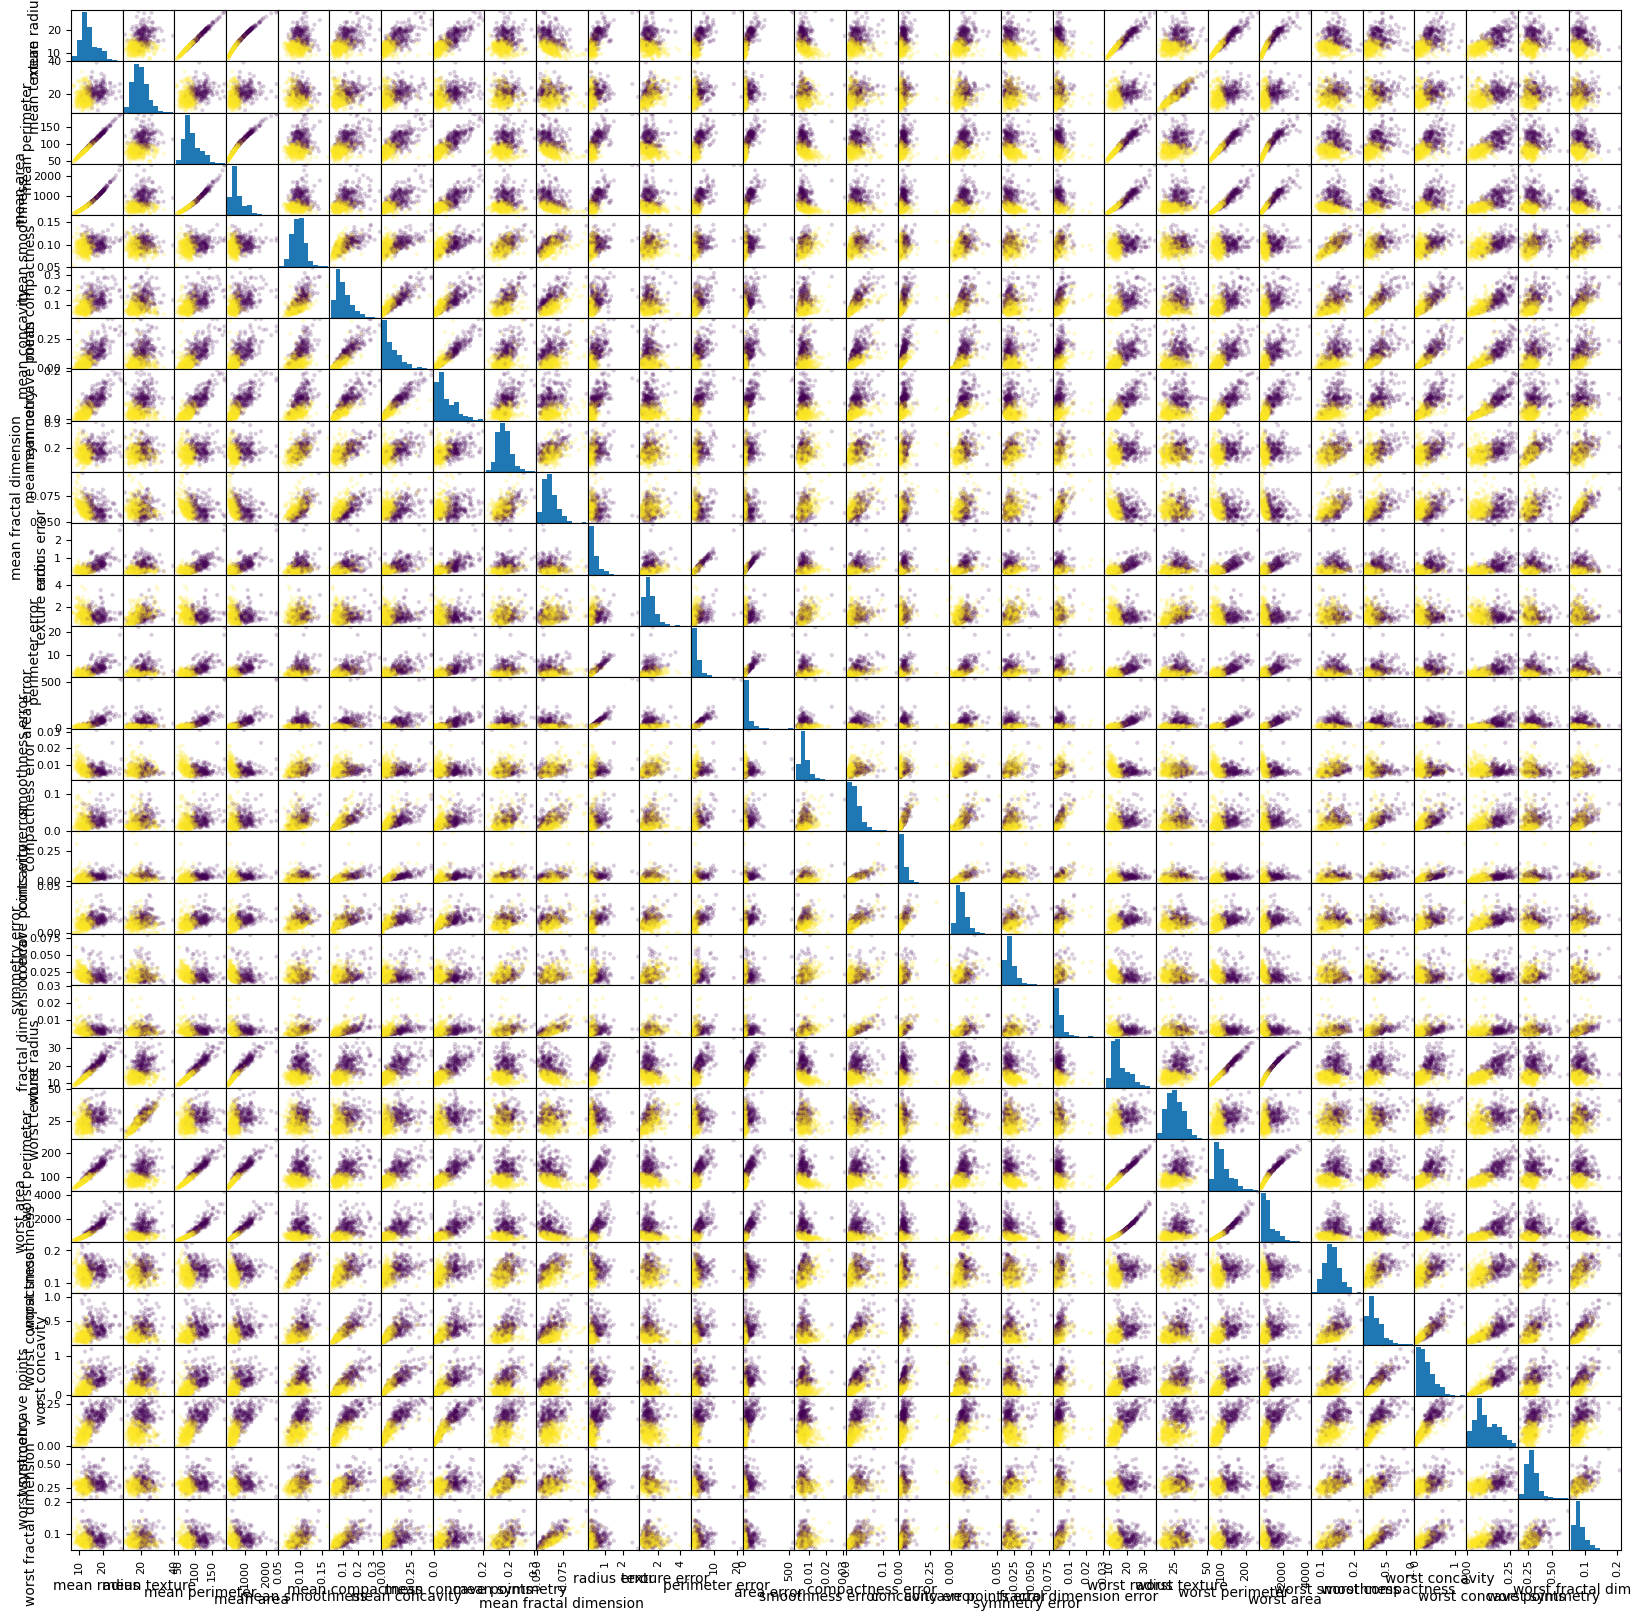

In [37]:
# TODO 3-1.1
from pandas.plotting import scatter_matrix

features = df_breast.columns[:-1]
scatter_matrix(df_breast[features], c=df_breast['diagnosis'], figsize=(20, 20), alpha=0.2)
plt.show()

Wow! There are a lot of features. Even x and y label texts overlap, so we can't read! 
However, we can see some input features are dependent to each other (highly correlated). This tells us that some of the features are redundant (so possible reduction). But for now, let us pick some features to zoom in through just simply picking up first six features.



### TODO 3-2
1. Now, plot the same scatter plot as in TODO 12-1 but now only use the first 6 features. 

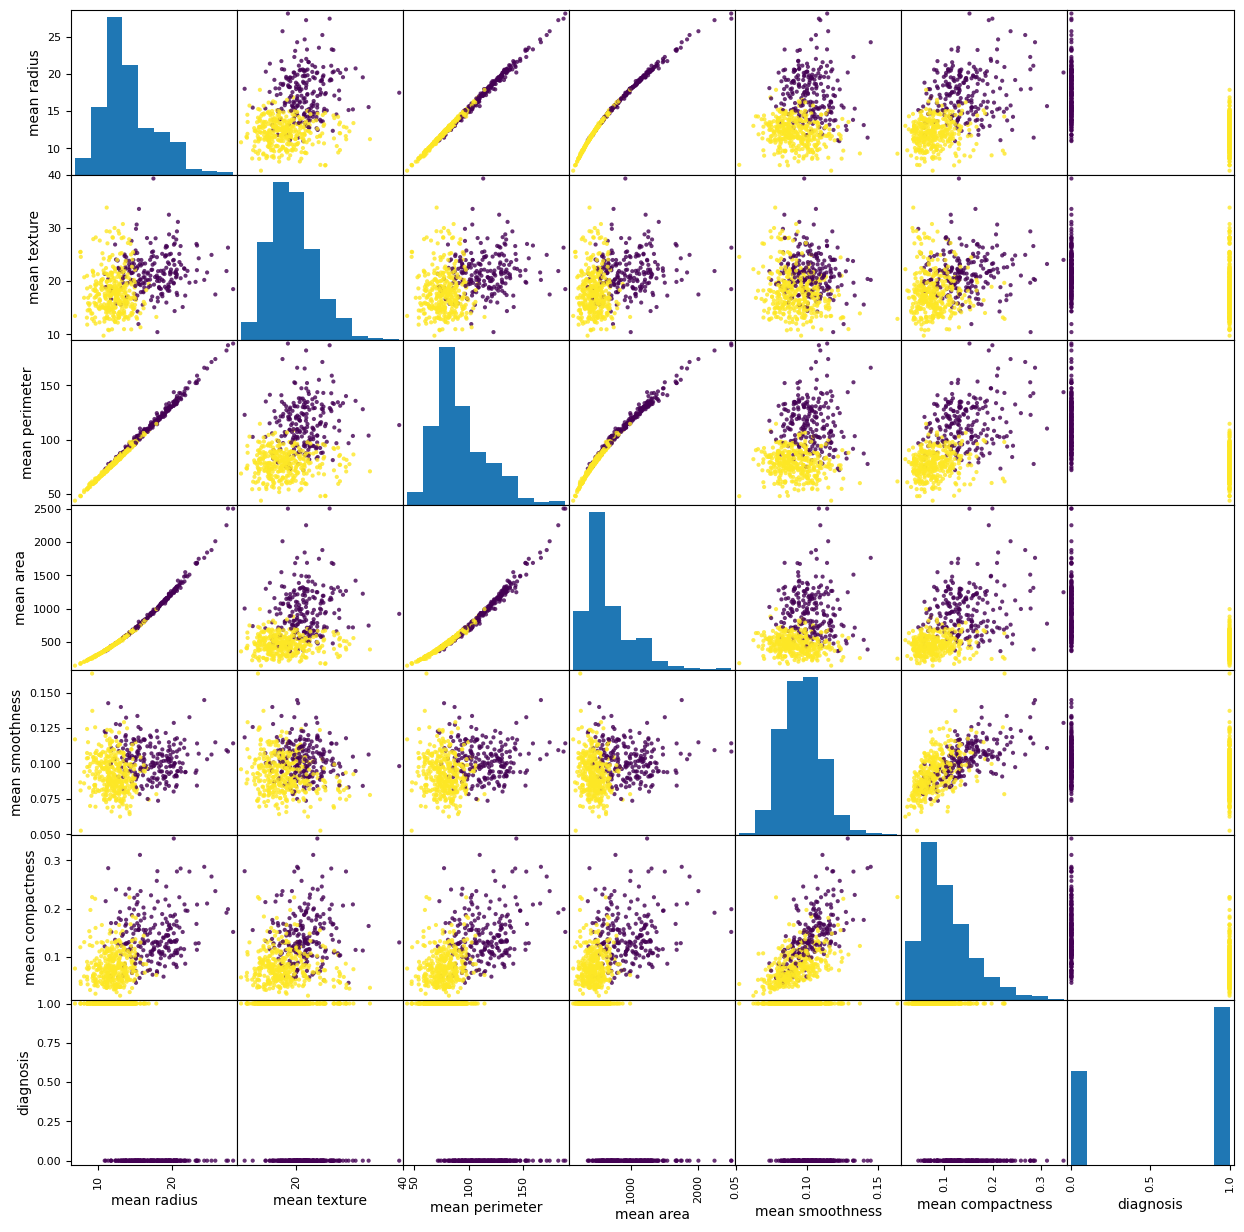

In [38]:
# TODO 3-2.1
first_six_features = df_breast.columns[:6].tolist()  
features_and_diagnosis = first_six_features + ['diagnosis']  

scatter_matrix(df_breast[features_and_diagnosis], c=df_breast['diagnosis'], figsize=(15, 15), alpha=0.8, diagonal='hist')

plt.show()

By zooming to each scatter plot, we can better observe the data. 
However, the diagonal layered kernel density estimate (KDE) with single color for all data is a bit less informative. 
Seaborn pairplot does very similar with the different colors for the diagonal KDE. So, let us try it.



### TODO 3-3
1. Plot the same scatter plot as in TODO 3-2 using the first 6 features but now use Seaborn's `pairplot()` function to generate the plot.

    1. Hint: `hue` is the key to specify the column name for the label. 

**If you don't have [seaborn library installed](https://seaborn.pydata.org/installing.html), you can install it by running the following:** 

   <code>pip install seaborn</code>

   or 

   <code>conda install seaborn</code> 



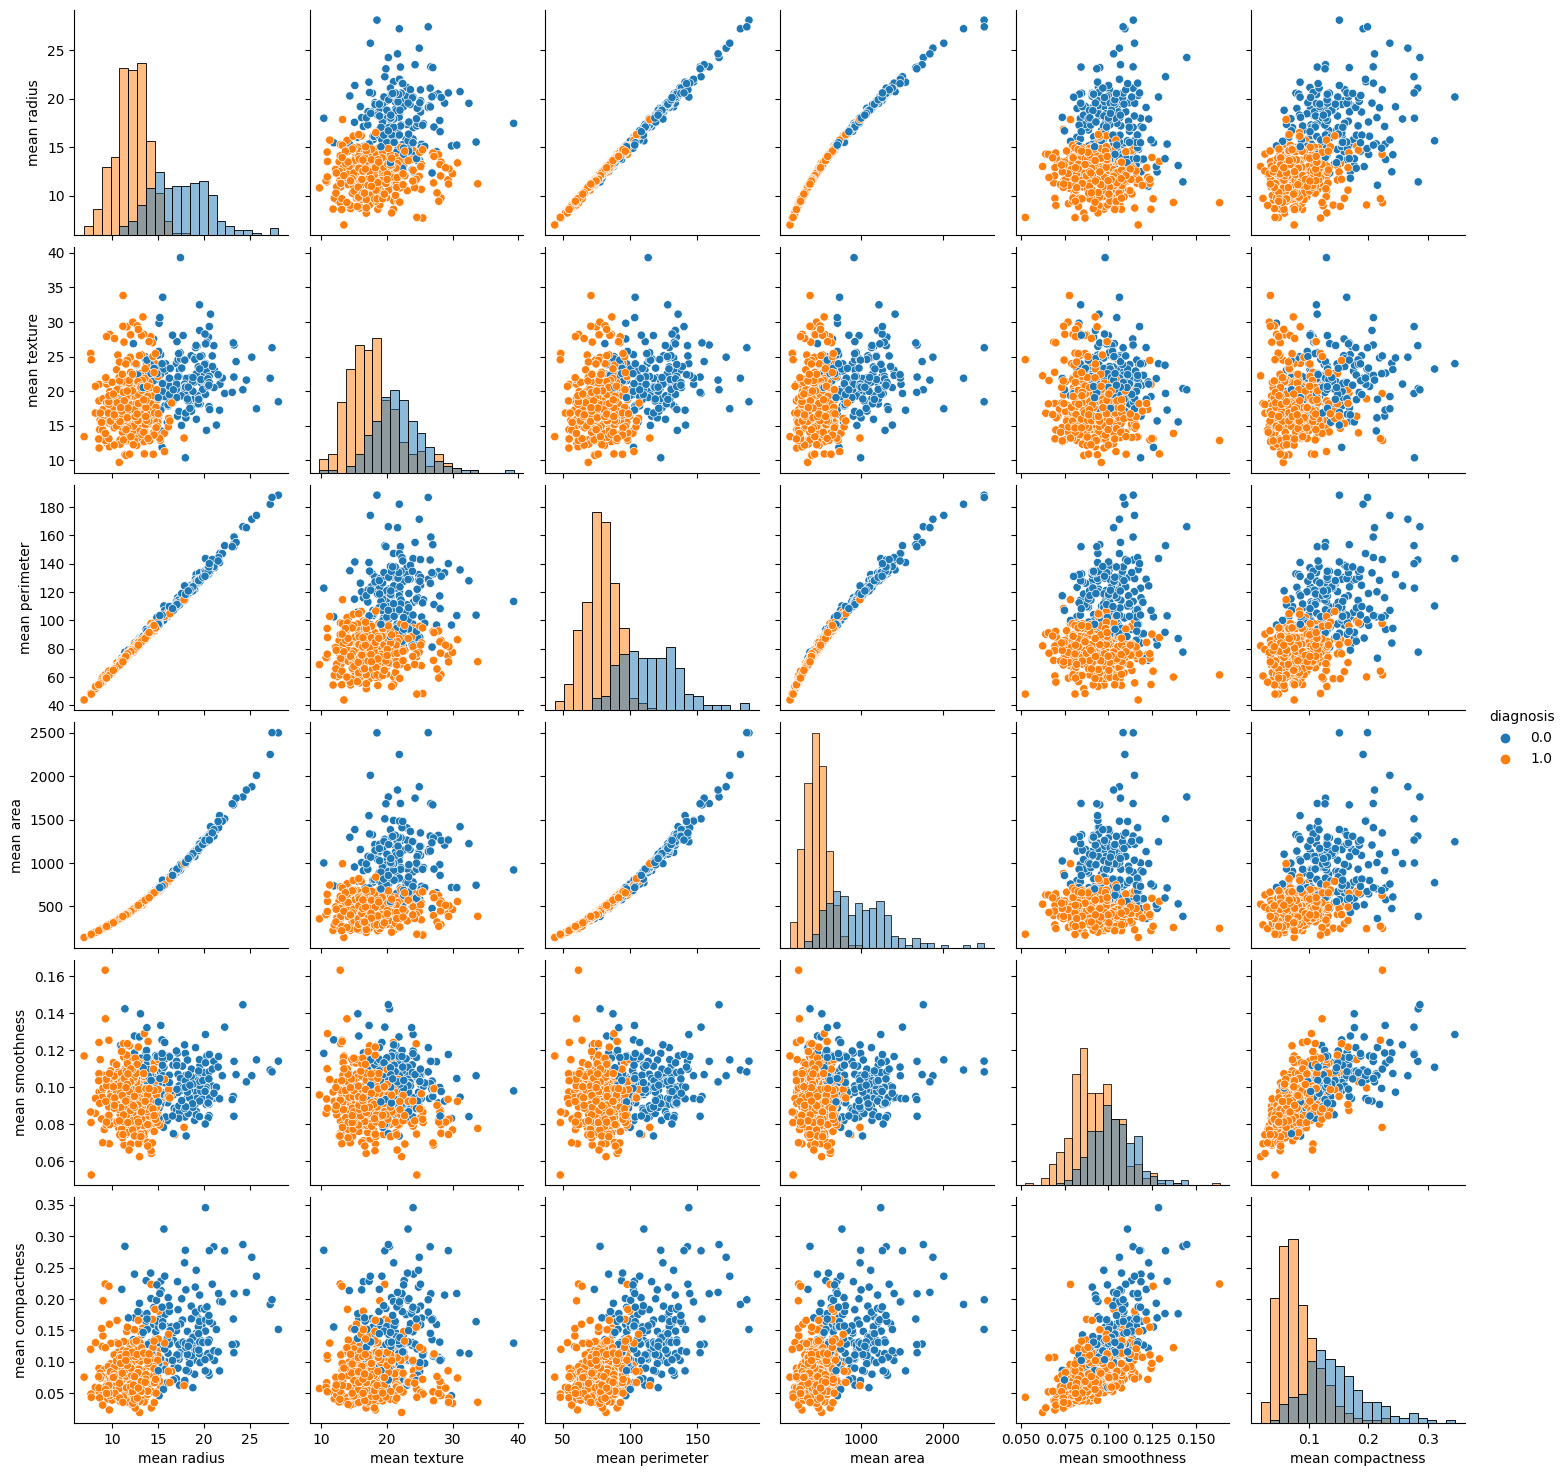

In [39]:
import seaborn as sns

# TODO 3-3.1
columns_to_plot = df_breast.columns[:6].tolist() + ['diagnosis']
sns.pairplot(df_breast[columns_to_plot], hue='diagnosis', diag_kind='hist')
plt.show()

We now see the zoomed distribution with how the input features are distributed for the twom positive and negative classes. If they are largely overlap, the input feature by itself might not be a good factor to classify the data. I said "by itself" because it might be necessary as it can combine with other feature to form important decision factors.   

# Applying Linear Classification to Iris

Now it's time to apply newly learned linear classification algorithms. However, be thinking about the following questions before starting, as your apply the algorithms, and as you analyze the results.

- What do we need to do first to the data before running the algorithms?
- How accurate were the linear classifiers on Iris? 
- How can we quantitatively show this measure of accuracy? 

## Data Partitioning
For the first question if you're thinking that we still need to partition our data, you're correct! As stated, we still need to split the iris and breast cancer data into a training and testing set, as discussed and practiced last week. Remember, this is to simulate seen (train) and unseen (test) data!

<div id="TODO4"></div>

### TODO 4

We are going to write a general data splitting function `split_iris_data()` so we can call it later on in the notebook using any dataset we want!

1. Split the passed data `data` and targets `target` using Sklearn's `train_test_split()` function. Store the values into `X_train`, `X_test`, `t_train`, and `t_test`. Be sure to pass the arguments that correspond to the following descriptions:
    1. Split the data/targets using a 80/20 split (80% for training and 20% for testing).
    1. Use a seed of 0 for the `random_state`. **WARNING: If you don't use this seed, you are likely to fail future TODOs even if your code is correct!**


In [40]:
from sklearn.model_selection import train_test_split

def data_splitting(data, target):
    
    # TODO 4.1
    X_train, X_test, t_train, t_test = train_test_split(data, target, test_size=0.2, random_state=0)

    return X_train, X_test, t_train, t_test

# Notice we pass iris.data to data and iris.target to target!
X_train, X_test, t_train, t_test = data_splitting(
    data=iris.data, 
    target=iris.target
)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (120, 4)
Train target shape: (120,)
Test data shape: (30, 4)
Test target shape: (30,)


In [41]:
todo_check([
    ("X_train.shape == (120, 4)", "X_train has the wrong shape"),
    ("X_test.shape == (30, 4)", "X_test has the wrong shape"),
    ("t_train.shape == (120,)", "t_train has the wrong shape"),
    ("t_test.shape == (30,)", "t_test has the wrong shape"),
])

Your code PASSED the code check!


##  Applying the Perceptron Algorithm
The first algorithm we are going to implement is the perceptron algorithm. Recall from our notes that the perceptron algorithm predicts binary classes. The required targets for this algorithm are -1 and 1. This is because the algorithm classifies a data sample as the positive class (target is 1) if the value of the prediction is greater than 0. Likewise, the algorithm classifies a data sample as the negative class (target is -1) if the value of the prediction is less than zero. When the output is exactly zero then it can be unclear to which class the sample belongs to, this is typically a rare event.

We can calculate our prediction by applying the dot product between the current weight vector $w$ and the current data sample vector $x_i$.
\begin{equation}
y = w \cdot x_i
\tag{1}
\end{equation}

We can update our weight vector by taking the element-wise multiplication between the current scalar target $t_i$ and the current data sample vector $x_i$ and then applying our learning-rate $\alpha$ to scale the weight update. Remember that the sign of $t_i$ represents which direction we need to update our weights in!
\begin{equation}
w = w + \alpha t_i x_i
\tag{2}
\end{equation}

**References**

- https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975
    - A good blog post to see how all the parts, linear algebra, and calculus, of the perceptron algorithm come together.

### Converting to Binary Classes
Wait a second! How many classes do we have in the iris data? Let's print out the number unique targets below to see how many classes we have. Remember that perceptron only works on binary classification!

Let's confirm how many classes `t_train` has. First, we are going to make a copy of `t_train` called `t_train_copy` to prevent editing of the original memory locations.

In [42]:
t_train_copy = t_train.copy()

np.unique(t_train_copy)

array([0, 1, 2])

Oh no! It has three classes. How can we apply binary classifiers when we have three classes? 

To get around this issue we usually apply binary classifiers multiple times in a one-vs-another classification format. This means we pick one class say setosa to be the positive class and then combine the remaining classes into a singel class,  the negative class. In essences, we are now trying to determine if a given sample is of the positive class setosa or the negative class, where the negative class is anything but setosa. So, if we wanted to classify all the samples into their exact class we'd have perform the aforementioned idea three times, where each class acts as the postive class and the remaining classes act as the negative class.

For this exercise, we will only focus on classifying our data as setosa or not. Once again, this means that setosa acts as our positive class and the remaining two classes, versicolor and  virginica, combine to give us the negative class.

The next few cells represent the code for setting versicolor and virginica to both have the negative class target of -1.

Using the below code we find all locations for the classes versicolor, and virginica. We do so by simply testing for where the targets in `t_train_copy` are above 1. Remember versicolor corresponds to the target 1 and virginica corresponds to the target 2, so we can simply check for where the targets are greater than or equal to 1!

In [43]:
t_train_copy >= 1

array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
       False,  True,  True, False, False,  True, False, False, False,
        True,  True,  True, False, False, False,  True,  True, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False])

Next, we use the previous code to index `t_train_copy` only where all the targets are greater than or equal to 1 (this is represented by the 'True' values given in the output above) and then we set these indexed `t_train_copy` targets to -1.

In [44]:
t_train_copy[t_train_copy >= 1] = -1

Now let's take a look at what are class targets are now!

In [45]:
np.unique(t_train_copy)

array([-1,  0])

This is good, we have successfully combined our two classes versicolor and virginica into a single negative class. However, recall that if we want to make a prediction our class targets need to be -1 and 1. This is currently not the case. Let's fix this by setting setosa to have a target of 1, corresponding to the positive class.

In [46]:
t_train_copy == 0

array([False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
        True, False, False,  True,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True, False, False,  True,
        True, False,  True, False, False, False, False,  True, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True])

In [47]:
t_train_copy[t_train_copy == 0] = 1

We can validate our method work by checking the number of unique targets in `t_train_copy`. As we can see there are now only two targets. One represents our negative class (target equal to -1) which corresponds to versicolor and virginica. The other represents our positive class (target equal to 1) which corresponds to setosa.

In [48]:
np.unique(t_train_copy)

array([-1,  1])

<div id="TODO5"></div>

### TODO 5

Let's redo what we did above but now converting our code into a function called `convert_targets()`. Repeat the above target reassignment for `t_train` and now for `t_test` as well.

1. Set the versicolor (target 1) and virginica (target 2) classes in `t_train` to -1
2. Set the setosa class (target 0) in `t_train` to 1
3. Set the versicolor (target 1) and virginica (target 2) classes in `t_test` to -1
4. Set the setosa class (target 0) in `t_test` to 1

In [49]:
def convert_targets(t_train, t_test):
    """ Convert partitioned targets to binary targets formatted for the perceptron algorithm.
        
        Note:
            This operation is an in-place operation which means the passed data 
            values are directly modified when running this function!
    
    """
    # TODO 5.1
    t_train[(t_train == 1) | (t_train == 2)] = -1
    
    # TODO 5.2
    t_train[t_train == 0] = 1
    
    # TODO 5.3
    t_test[(t_test == 1) | (t_test == 2)] = -1
    
    # TODO 5.4
    t_test[t_test == 0] = 1
    
    return t_train, t_test

Run the below code cell to test if the `convert_targets()` function works! You should see two unique targets `[-1, 1]` for both the training and testing sets!

In [50]:
new_t_train, new_t_test = convert_targets(t_train.copy(), t_test.copy())
print("New training targets: {}".format(np.unique(new_t_train)))
print("New test targets: {}".format(np.unique(new_t_test)))

todo_check([
    ("new_t_train.shape == t_train.shape", "new_t_train shape does not match t_train"),
    ("new_t_test.shape == t_test.shape", "new_t_test shape does not match t_test"),
    ("np.all(np.unique(new_t_train) == [-1, 1])", "new_t_train has incorrect values"),
    ("np.all(np.unique(new_t_test) == [-1, 1])", "new_t_test has incorrect values"),
])

New training targets: [-1  1]
New test targets: [-1  1]
Your code PASSED the code check!


## Performing Classification

<div id="TODO6"></div>

### TODO 6

Let us test the binary converted iris target with Perceptron.

1. Create an instance using the proper Sklearn class for running the perceptron algorithm. Store the output into `clf`. 
    1. Hint: Make sure to import and use the right class. You can find the correct class to import and use by referring to the slides.
    
    
2. Train the Perceptron model using the `X_train` and `t_train`.


3. Evaluate the model by computing the score using the train data `X_train` and train labels `t_train`. Store the output into `train_score`.


4. Evaluate the model by computing the score using the test data `X_test` and test labels `t_test`. Store the output into `test_score`.


5. Using `clf`, make a predictions for the train data `X_train`. and test data `X_test`. Store the output inside `y_train`


6. Using `clf`, make a predictions for the test data `X_test`. Store the output inside `y_test`


The `score()` method for classifiers quantifies the results by computing the accuracy as given below: 
$$
  accuracy = \frac{\text{total number of correct classification}} {\text{total number of data samples}}. 
$$

Train Accuracy: 1.0, Test Accuracy: 1.0


Text(0.5, 1.0, 'Test')

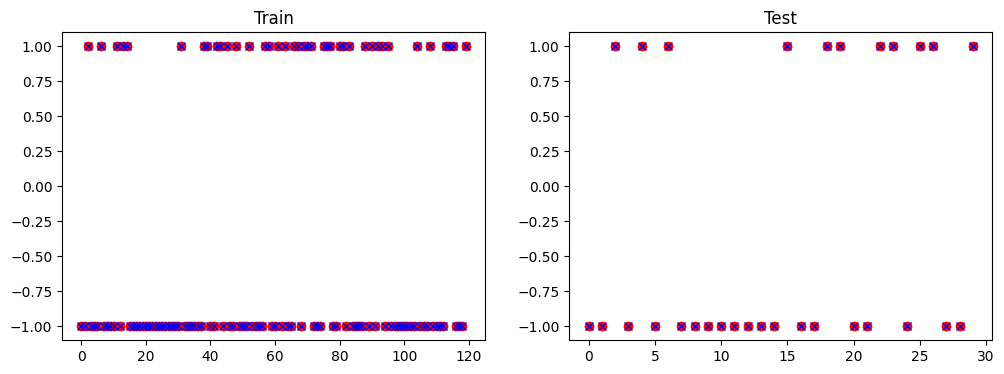

In [51]:
# TODO: Import a proper module
from sklearn.linear_model import Perceptron

X_train, X_test, t_train, t_test = data_splitting(iris.data, iris.target)
convert_targets(t_train, t_test) # Changes values in-place

# TODO 6.1
clf = Perceptron(random_state=0)

# TODO 6.2
clf.fit(X_train, t_train)

# TODO 6.3
train_score = clf.score(X_train, t_train)

# TODO 6.4
test_score = clf.score(X_test, t_test)

print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

# TODO 6.5
y_train = clf.predict(X_train)

# TODO 6.6
y_test = clf.predict(X_test)

plt.figure(figsize=(12,4))
plt.subplot(121)

# Plot the train labels using the 'ro' marker, y_train using the 'bx' marker.
plt.plot(t_train, 'ro')
plt.plot(y_train, 'bx')
plt.title("Train")

plt.subplot(122)

# Plot the test labels using the 'ro' marker, y_train using the 'bx' marker.
plt.plot(t_test, 'ro')
plt.plot(y_test, 'bx')
plt.title("Test")

In [52]:
todo_check([
    ("train_score > .9", "train_score needs to be greater than .9"),
    ("test_score > .9", "test_score needs to be greater than .9"),
])

Your code PASSED the code check!


Here, the red dots are the target labels for each sample (indexed by the x-axis). The blue crosses are predictions, so the samples with both markers at the same position represent correct classifications. 

In [53]:
garbage_collect(['X_train', 'X_test', 't_train', 't_test', 'clf', 'train_score', 'test_score', 'y_train', 'y_test'])

### Using Sklearn One-vs-Rest

Previously we manually converted the three target classes into two binary classes with the labels -1 and 1 so that they would be compatible with the algorithm Perceptron and binary classification in general. 

Well, as we learned in the lecture, the binary classifiers can be easily extended to multi-class classification by using one-vs-rest or one-vs-one manner. Let us practice One-vs-Rest classification using Scikit-Learn which will automatically take care of preparing our targets for a multi-class classification problem. 



<div id="TODO7"></div>

### TODO 7

Sklearn's `OneVsRestClassifier` class allows us to run multiclass classification by simply wrapping binary classifiers. You can take a look at the [reference](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html?highlight=onevsrest#sklearn.multiclass.OneVsRestClassifier) for more information. As we'll see, for a 3-way classification problem with a binary classifier `OneVsRestClassifier` will automatically generate 3 classifiers, one for each one-vs-rest problem formulation.

1. Create an Sklearn's `OneVsRestClassifier` which we'll pass as input a instance of Skleanrn's `Perceptron` class. Store the output into `clf`. 
    1. Hint: Make sure to import and use the right class. You can find the correct class to import and use by referring to the slides.
    
    
2. Train the `OneVsRestClassifier` class instance using the `X_train` and `t_train`.


3. Evaluate the model by computing the score using the train data `X_train` and train labels `t_train`. Store the output into `train_score`.


4. Evaluate the model by computing the score using the test data `X_test` and test labels `t_test`. Store the output into `test_score`.


5. Using `clf`, make a predictions for the train data `X_train`. and test data `X_test`. Store the output inside `y_train`


6. Using `clf`, make a predictions for the test data `X_test`. Store the output inside `y_test`

Train Accuracy: 0.7, Test Accuracy: 0.6


Text(0.5, 1.0, 'Test')

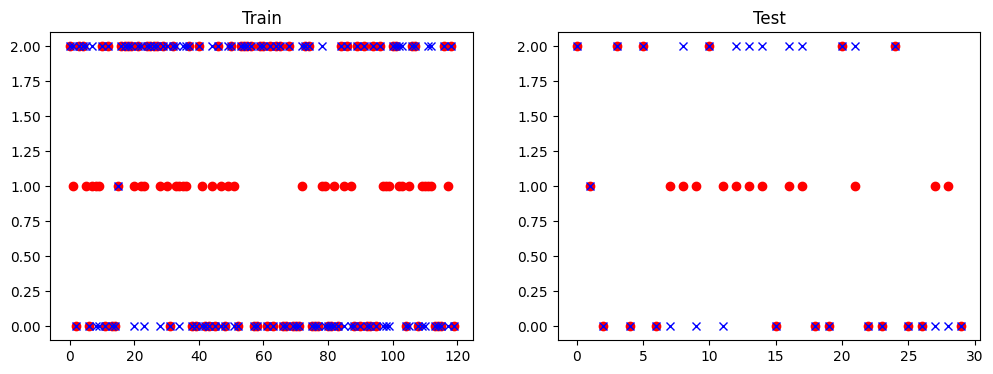

In [54]:
# TODO: Import a proper module
from sklearn.multiclass import OneVsRestClassifier

X_train, X_test, t_train, t_test = data_splitting(iris.data, iris.target)

# TODO 7.1
clf = OneVsRestClassifier(Perceptron(random_state=0))

# TODO 7.2
clf.fit(X_train, t_train)

# TODO 7.3
train_score = clf.score(X_train, t_train)

# TODO 7.4
test_score = clf.score(X_test, t_test)

print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

# TODO 7.5
y_train = clf.predict(X_train)

# TODO 7.6
y_test = clf.predict(X_test)

plt.figure(figsize=(12,4))
plt.subplot(121)

# Plot the train labels using the 'ro' marker, y_train using the 'bx' marker.
plt.plot(t_train, 'ro')
plt.plot(y_train, 'bx')
plt.title("Train")

plt.subplot(122)

# Plot the test labels using the 'ro' marker, y_train using the 'bx' marker.
plt.plot(t_test, 'ro')
plt.plot(y_test, 'bx')
plt.title("Test")

In [55]:
todo_check([
    ("isinstance(clf, OneVsRestClassifier)", "`clf` is not of type `OneVsRestClassifier`"),
    ("train_score > .6", "train_score needs to be greater than .6"),
    ("test_score > .5", "test_score needs to be greater than .5"),
])

Your code PASSED the code check!


If we quickly print out all variables for the `clf` model we can see it learns 3 different `estimators_`, one for each class. Each estimator is trained on a different one-vs-rest problem. For example, we can assume the first estimator corresponds to using 0 as the positive label and classes 1 and 2 as the negative label.

In [56]:
clf.__dict__

{'estimator': Perceptron(),
 'n_jobs': None,
 'verbose': 0,
 'label_binarizer_': LabelBinarizer(sparse_output=True),
 'classes_': array([0, 1, 2]),
 'estimators_': [Perceptron(), Perceptron(), Perceptron()],
 'n_features_in_': 4}

In [57]:
garbage_collect(['X_train', 'X_test', 't_train', 't_test', 'clf', 'train_score', 'test_score', 'y_train', 'y_test'])

## Exploring More Linear Classifiers

<div id="TODO8"></div>

Now, let us try all the classifiers that we learned this week to classify the Iris dataset. 

### TODO 8

*Feel free to reuse code from prior TODOs*

1. Create instances of each classifier which corresponds to the names in the `names` list. Not all classifiers will be imported so feel free to import any classifiers you need from Sklearn. Utilize the following instructions to create the 7 classifiers:
    1. Create a class instance for ridge classification. Store the output into `ridge`.
    1. Create a class instance for the perceptron. Store the output into `perceptron`.
    1. Create a class instance for stochastic gradient descent (SGD) classification. Store the output into `sgd`.
    1. Create a class instance for logistic classification. Store the output into `logreg`.
    1. Create a class instance for K-nearest neighbors classification. Store the output into `knn`.
    1. Create a class instance for Gaussian Naive Bayes classification. Store the output into `nb`.
    1. Hint: Notice all the names of these classifiers correspond to the variables within the `clfs` list and `names` list.


2. Create an Sklearn's `OneVsRestClassifier` where we pass the current classifier `clf` as input. Store the output back into `clf`. 
    1. Hint: Make sure to import and use the right class. You can find the correct class to import and use by referring to the slides.
    
    
3. Train the `OneVsRestClassifier` class instance using the `X_train` and `t_train`.


4. Evaluate the model by computing the score using the train data `X_train` and train labels `t_train`. Store the output into `train_score`.


5. Evaluate the model by computing the score using the test data `X_test` and test labels `t_test`. Store the output into `test_score`.


6. Using `clf`, make a predictions for the train data `X_train`. and test data `X_test`. Store the output inside `y_train`


7. Using `clf`, make a predictions for the test data `X_test`. Store the output inside `y_test`


8. Observing the results and plots for each classifier. What do you think? Is there a best classifier?

======================Ridge=======================
Train Accuracy: 0.8583333333333333
Test Accuracy: 0.8


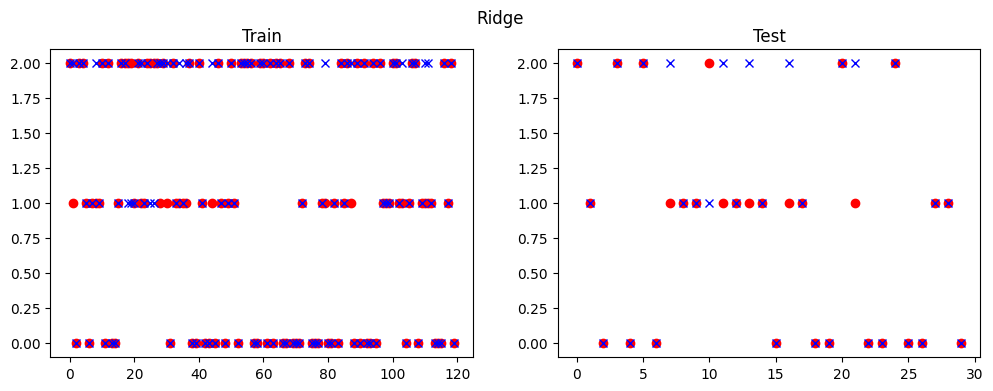

====================Perceptron====================
Train Accuracy: 0.7
Test Accuracy: 0.6


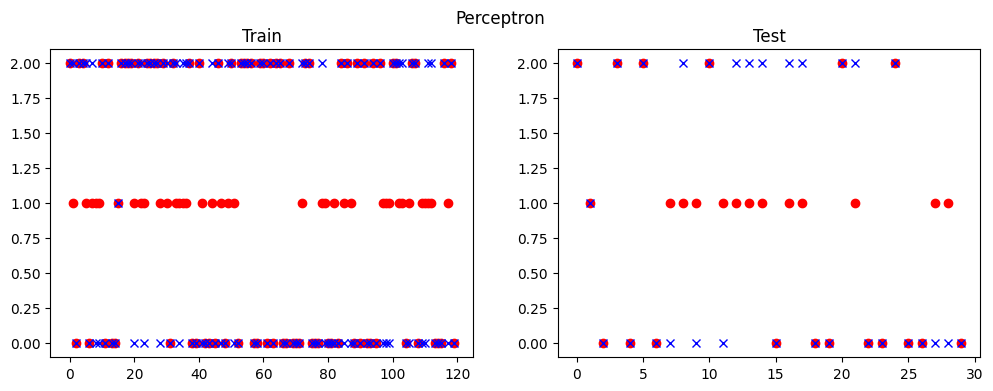

=======================SGD========================
Train Accuracy: 0.9333333333333333
Test Accuracy: 1.0


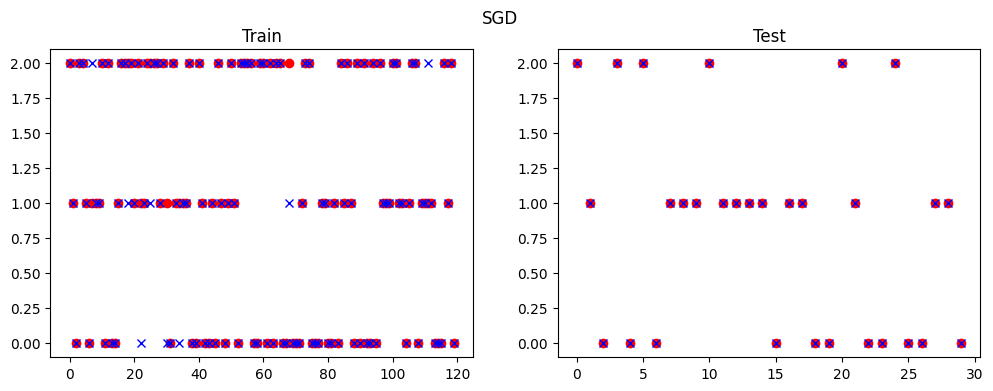

===============Logistic Regression================
Train Accuracy: 0.925
Test Accuracy: 0.9666666666666667


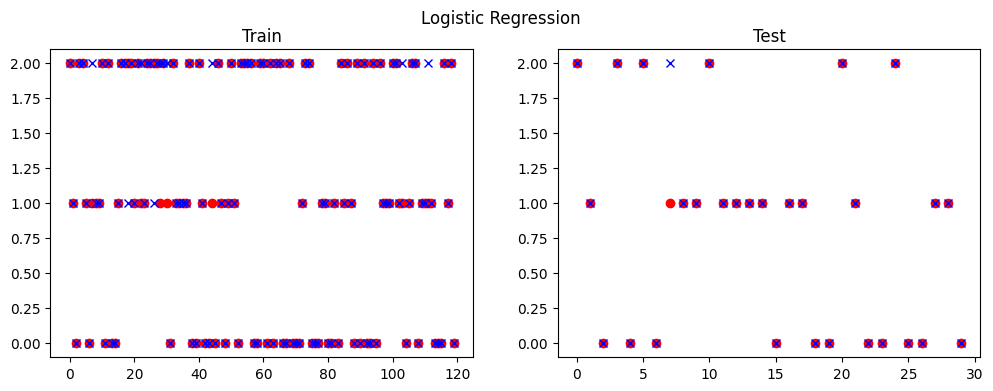

=======================kNN========================
Train Accuracy: 0.95
Test Accuracy: 0.9666666666666667


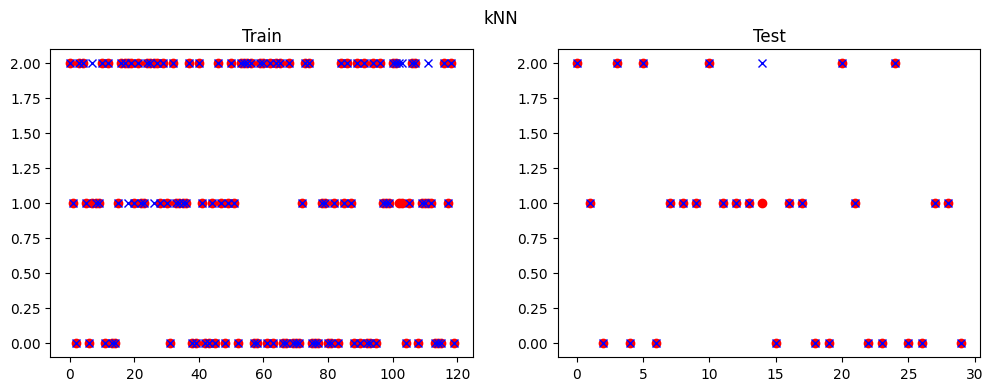

===================Naive Bayes====================
Train Accuracy: 0.9333333333333333
Test Accuracy: 0.9666666666666667


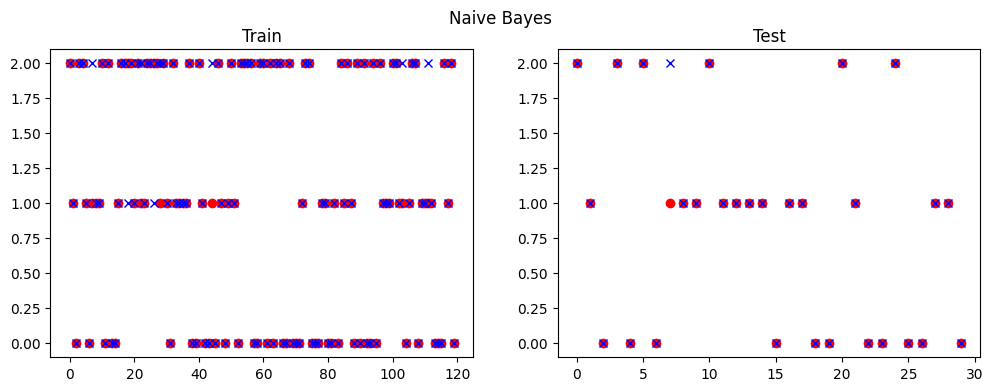

In [58]:
# TODO: Import necessary modules
from sklearn.linear_model import RidgeClassifier, Perceptron, SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn import datasets


X_train, X_test, t_train, t_test = data_splitting(iris.data, iris.target)

# TODO 8.1
ridge = RidgeClassifier()
perceptron = Perceptron()
sgd = SGDClassifier()
logreg = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()

# list of algorithms to test
clfs = [ ridge, perceptron, sgd, logreg, knn, nb]
# list of algorithm names 
names = ["Ridge", "Perceptron", "SGD", "Logistic Regression", "kNN", "Naive Bayes"]

# Loop through classifiers defined above
for name, clf in zip(names, clfs):
    print("{:=^50s}".format(name))
    
    # TODO 8.2
    clf = OneVsRestClassifier(clf)

    # TODO 8.3
    clf.fit(X_train, t_train)
    
    # TODO 8.4
    train_score = clf.score(X_train, t_train)
    
    # TODO 8.5
    test_score = clf.score(X_test, t_test)
    
    print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}")
    
    # TODO 8.6
    y_train = clf.predict(X_train)
    
    # TODO 8.7
    y_test = clf.predict(X_test)
    
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    plt.plot(t_train, 'ro')
    plt.plot(y_train, 'bx')
    plt.title("Train")
    
    plt.subplot(122)
    plt.plot(t_test, 'ro')
    plt.plot(y_test, 'bx')
    plt.title("Test")
    plt.suptitle(name)
    plt.show()

`TODO 8.8` Observing the results and plots for each classifier. What do you think? Is there a best classifier?

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER`:  SGD beacuse it has the highest test accuracy

Wait a second, some of the classifiers we defined above can inherently deal with multi-class classification problems without the one-vs-rest wrapper. Let's try using just these multi-class classifiers without the one-vs-rest wrapper to see how they preform. 

<div id="TODO9"></div>



### TODO 9


*Feel free to reuse code from prior TODOs*

1.  From the following classifiers select the **4** that can inherently deal with multi-class classification problems: "Ridge", "Perceptron", "SGD", "SVM", "Logistic Reg", "kNN", "Naive Bayes". Once selected, create instances of each classifier in a list where each element of the list corresponds to a classifier, as done for `clfs` in TODO 8. Store the output into `clfs`.


2. Create the corresponding `names` list where each element is a string name for the classifier you defined in TODO 9.1. Store the output into `names`.
    1. Hint: See TODO 8. `names` should defined similarly to `names` in TODO 8 but 4 elements only of course.


3. Train the current classifier `clf` class instance using the `X_train` and `t_train`.


4. Evaluate the model by computing the score using the train data `X_train` and train labels `t_train`. Store the output into `train_score`.


5. Evaluate the model by computing the score using the test data `X_test` and test labels `t_test`. Store the output into `test_score`.


6. Using `clf`, make a predictions for the train data `X_train`. and test data `X_test`. Store the output inside `y_train`


7. Using `clf`, make a predictions for the test data `X_test`. Store the output inside `y_test`


8. Observing the results and plots for each classifier. Now, what do you think? Is there a new best classifier?

===============Logistic Regression================
Train Accuracy: 0.9666666666666667
Test Accuracy: 1.0


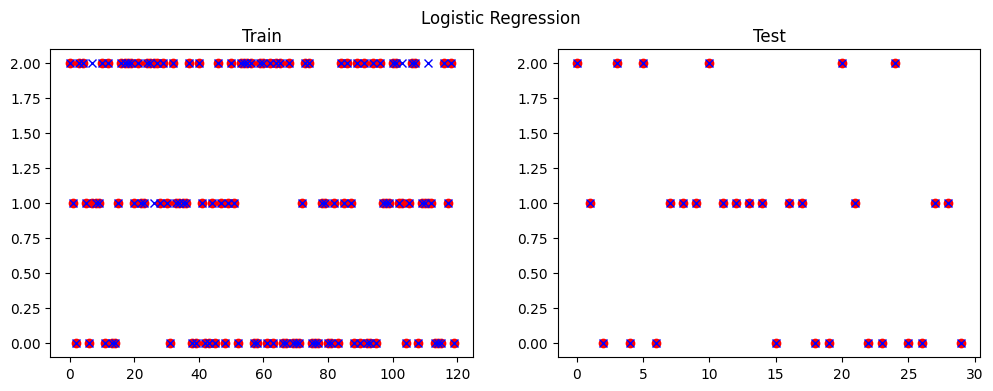

=======================kNN========================
Train Accuracy: 0.95
Test Accuracy: 0.9666666666666667


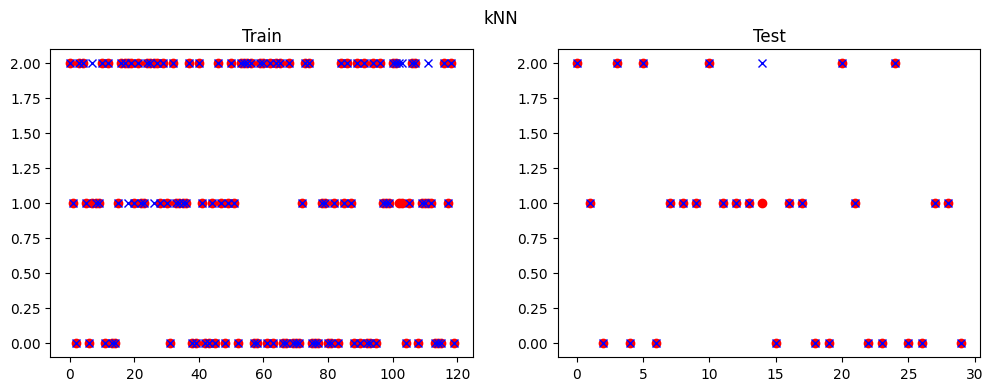

===================Naive Bayes====================
Train Accuracy: 0.95
Test Accuracy: 0.9666666666666667


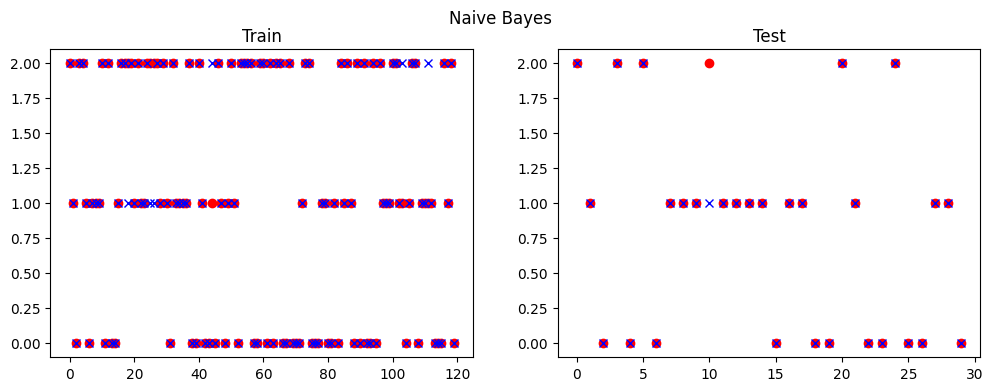

=======================SVM========================
Train Accuracy: 0.9583333333333334
Test Accuracy: 1.0


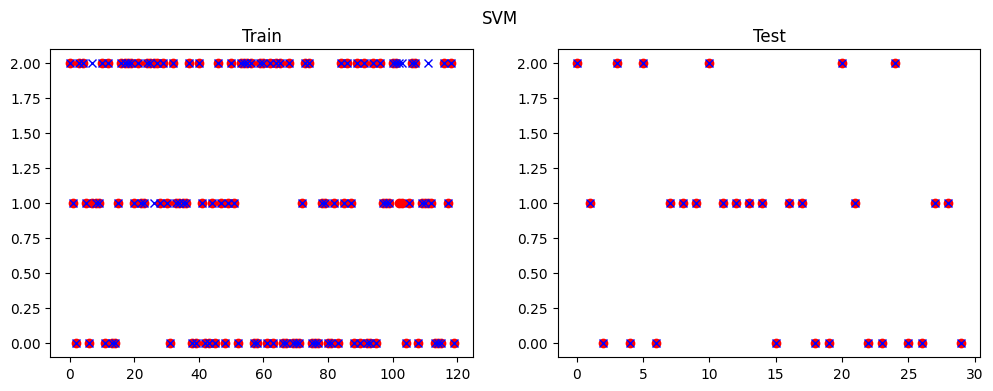

In [59]:
from sklearn.svm import SVC

# TODO 9.1
logreg = LogisticRegression(max_iter=200)  # increased to 200 for convergence
knn = KNeighborsClassifier()
nb = GaussianNB()
svm = SVC(probability=True)  # allowed for prob estimates

clfs = [logreg, knn, nb, svm]
# TODO 9.2
names = ["Logistic Regression", "kNN", "Naive Bayes", "SVM"]

for name, clf in zip(names, clfs):
    print("{:=^50s}".format(name))
    
    # TODO 9.3
    clf.fit(X_train, t_train)

    # TODO 9.4
    train_score = clf.score(X_train, t_train)

    # TODO 9.5
    test_score = clf.score(X_test, t_test)

    print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}")
    
    # TODO 9.6
    y_train = clf.predict(X_train)

    # TODO 9.7
    y_test = clf.predict(X_test)
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    plt.plot(t_train, 'ro')
    plt.plot(y_train, 'bx')
    plt.title("Train")
    
    plt.subplot(122)
    plt.plot(t_test, 'ro')
    plt.plot(y_test, 'bx')
    plt.title("Test")
    plt.suptitle(name)
    plt.show()

`TODO 9.8` Observing the results and plots for each classifier. Now, what do you think? Is there a new best classifier?

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER`: Logistic Regression


In [60]:
garbage_collect(['X_train', 'X_test', 't_train', 't_test', 'clf', 'train_score', 'test_score', 'y_train', 'y_test'])

# Breast Cancer Detection

Now, let us apply all the classifiers to breast cancer detection problem. This problem is binary classification, so we do not need multi-class conversion. 



<div id="TODO10"></div>


### TODO 10


*Feel free to reuse code from prior TODOs*

1. Split the cancer data by utilizing the `data_splitting()` function and the `cancer` variable. Store the outputs into `X_train`, `X_test`, `t_train`, `t_test`.

2. Create instances of each classifier which corresponds to the names in the `names` list. Not all classifiers will be imported so feel free to import any classifiers you need from Sklearn. Utilize the following instructions to create the 7 classifiers:
    1. Create a class instance for ridge classification. Store the output into `ridge`.
    1. Create a class instance for the perceptron. Store the output into `perceptron`.
    1. Create a class instance for stochastic gradient descent (SGD) classification. Store the output into `sgd`.
    1. Create a class instance for logistic classification. Store the output into `logreg`.
    1. Create a class instance for K-nearest neighbors classification. Store the output into `knn`.
    1. Create a class instance for Gaussian Naive Bayes classification. Store the output into `nb`.
    1. Hint: Notice all the names of these classifiers correspond to the variables within the `clfs` list and `names` list.

    
    
3. Train the current classifier instance `clf` using the `X_train` and `t_train`.


4. Evaluate the model by computing the score using the train data `X_train` and train labels `t_train`. Store the output into `train_score`.


5. Evaluate the model by computing the score using the test data `X_test` and test labels `t_test`. Store the output into `test_score`.


6. Using `clf`, make a predictions for the train data `X_train`. and test data `X_test`. Store the output inside `y_train`


7. Using `clf`, make a predictions for the test data `X_test`. Store the output inside `y_test`


8. Create a bar plot that compares the train and test accuracies of all the algorithms.
    1. Hint: `train_accs` stores the train accuracies for each model and `test_accs` stores the test accuracies for each model.


9. Observing the results and plots for each classifier. What do you think? Is there a best classifier? 

======================Ridge=======================
Train Accuracy: 0.9582417582417583
Test Accuracy: 0.956140350877193


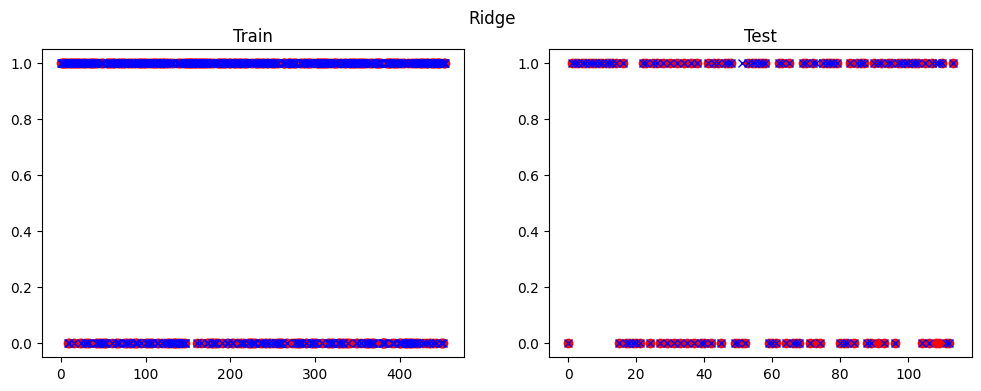

====================Perceptron====================
Train Accuracy: 0.589010989010989
Test Accuracy: 0.6491228070175439


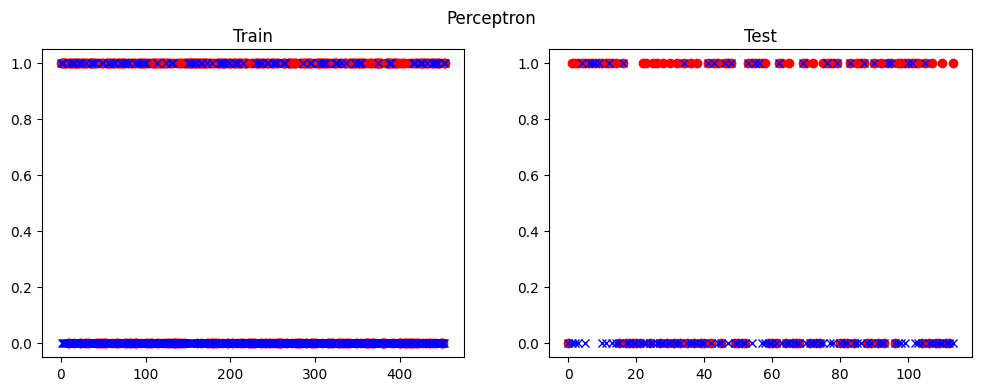

=======================SGD========================
Train Accuracy: 0.8989010989010989
Test Accuracy: 0.868421052631579


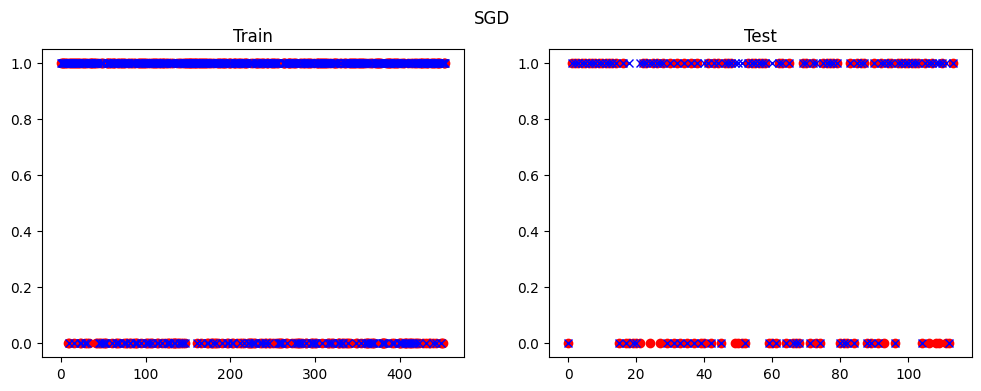

=======================SVM========================
Train Accuracy: 0.9098901098901099
Test Accuracy: 0.9298245614035088


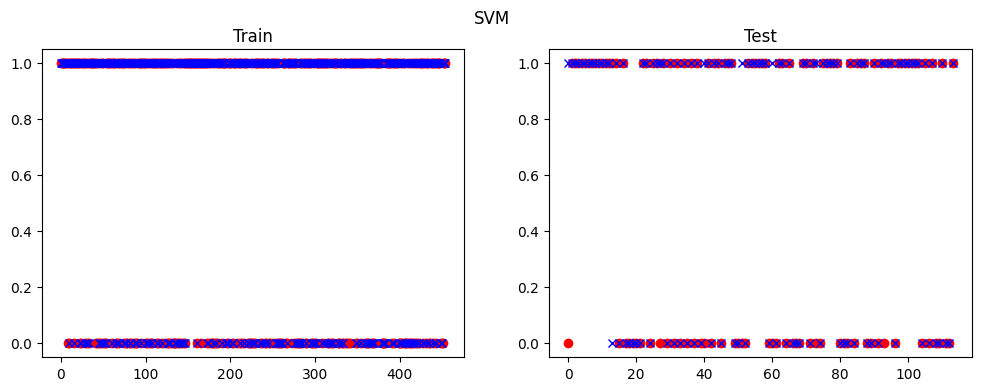

======================LogReg======================
Train Accuracy: 0.9626373626373627
Test Accuracy: 0.9473684210526315


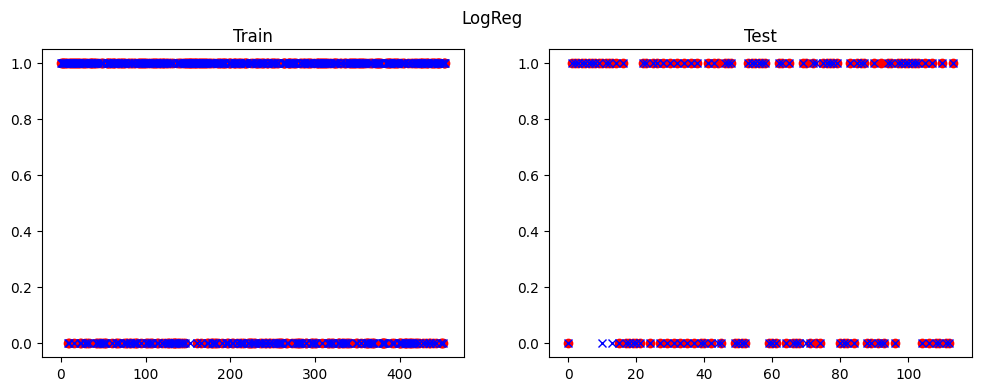

=======================kNN========================
Train Accuracy: 0.9494505494505494
Test Accuracy: 0.9385964912280702


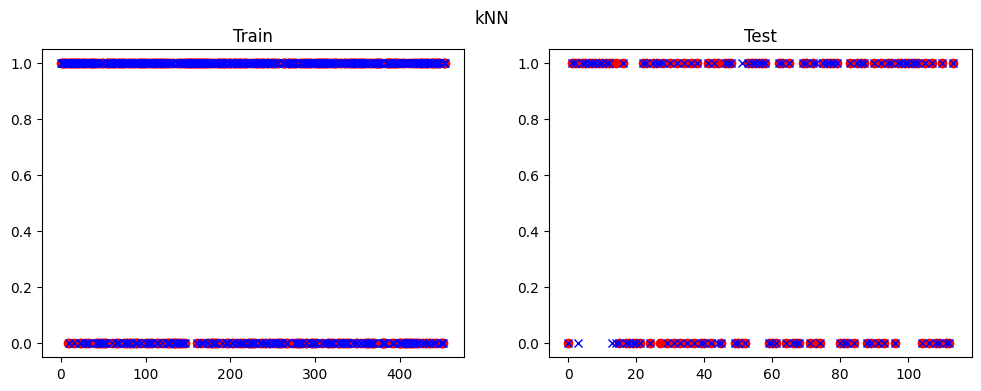

====================NaiveBayes====================
Train Accuracy: 0.9472527472527472
Test Accuracy: 0.9298245614035088


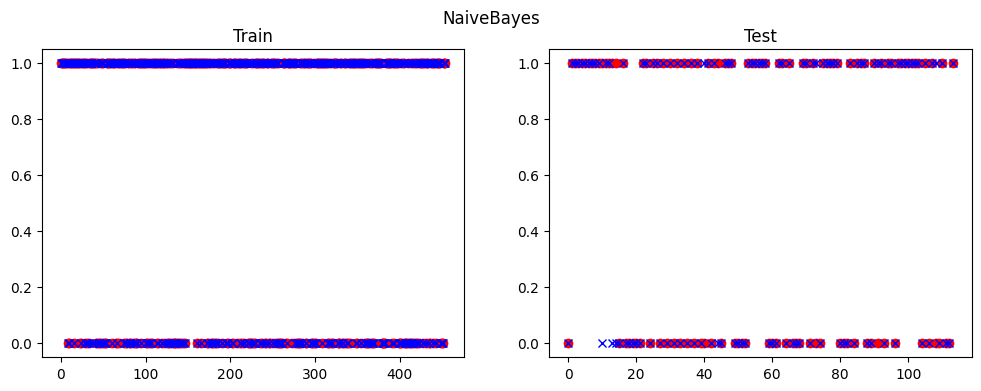

In [61]:
# TODO 10.1
cancer = load_breast_cancer()
X_train, X_test, t_train, t_test = data_splitting(cancer.data, cancer.target)

# TODO 10.2
ridge = RidgeClassifier()
perceptron = Perceptron()
sgd = SGDClassifier()
logreg = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier()
nb = GaussianNB()
svm = SVC(probability=True)

clfs = [ ridge, perceptron, sgd, svm, logreg, knn, nb]
names = ["Ridge", "Perceptron", "SGD", "SVM", "LogReg", "kNN", "NaiveBayes"]

train_accs = []
test_accs = []

for name, clf in zip(names, clfs):
    print("{:=^50s}".format(name))
    
    # TODO 10.3
    clf.fit(X_train, t_train)
    
    # TODO 10.4
    train_score = clf.score(X_train, t_train)
    
    # TODO 10.5
    test_score = clf.score(X_test, t_test)
    
    print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}")

    # TODO 10.6
    y_train = clf.predict(X_train) 
    
    # TODO 10.7
    y_test = clf.predict(X_test)
    
    # Track each model/classifier's train and test accuracy
    train_accs.append(train_score)
    test_accs.append(test_score)
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    plt.plot(t_train, 'ro')
    plt.plot(y_train, 'bx')
    plt.title("Train")
    
    plt.subplot(122)
    plt.plot(t_test, 'ro')
    plt.plot(y_test, 'bx')
    plt.title("Test")
    plt.suptitle(name)
    plt.show()

Add bar plot for `TODO 10.8` below.

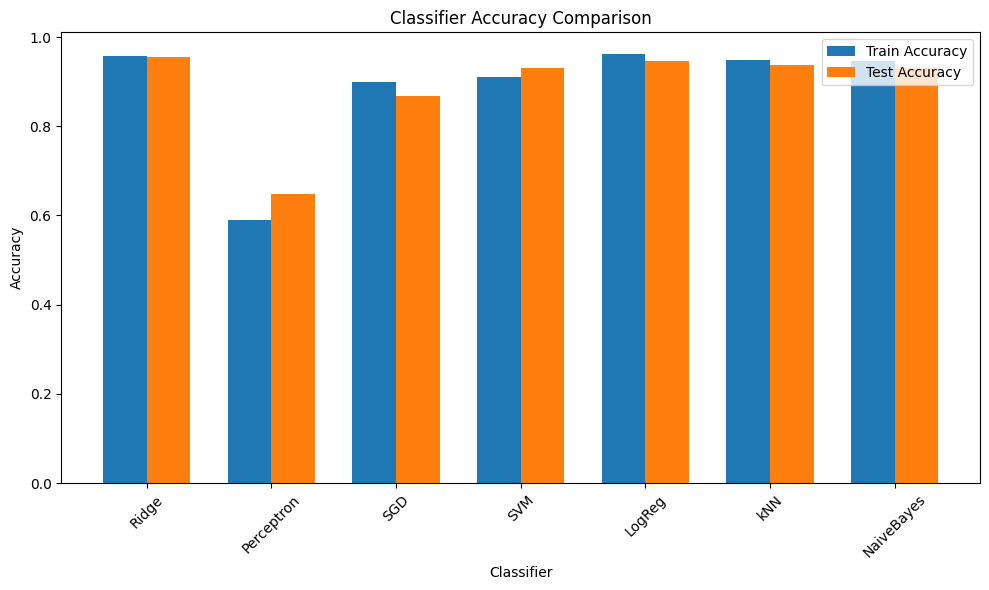

In [62]:
# TODO 10.8
index = np.arange(len(names))
bar_width = 0.35

plt.figure(figsize=(10, 6))
train_bar = plt.bar(index, train_accs, bar_width, label='Train Accuracy')
test_bar = plt.bar(index + bar_width, test_accs, bar_width, label='Test Accuracy')

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks(index + bar_width / 2, names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

`TODO 10.9`  Observing the results and plots for each classifier. What do you think? Is there a best classifier? 

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER`: Ridge because it has the clossest and highest test and train accuracy

<div id='TODO_EXTRA'></div>

### Extra Credit:

Repeat TODO 10 on the Maternal Health Risk Dataset ([Download here](https://www.archive.ics.uci.edu/dataset/863/maternal+health+risk)).

You are free to use any visualizations of your choice. Implement the above algorithms and write your observations on it. Comment on the accuracies that you've achieved on training these models on this dataset. Explore various parameters to increase the accuracies and comment on them.


**Note:** Make sure to preprocess the data before starting model training and evaluation processes.

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('Maternal Health Risk Data Set.csv')


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [75]:
label_encoder = LabelEncoder()
df['RiskLevel'] = label_encoder.fit_transform(df['RiskLevel'])

X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

X_train, X_test, t_train, t_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

logreg = LogisticRegression(max_iter=10000)
ridge = RidgeClassifier()
sgd = SGDClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
svm = SVC(probability=True)

clfs = [logreg, ridge, sgd, knn, nb, svm]
names = ["LogReg", "Ridge", "SGD", "kNN", "NaiveBayes", "SVM"]


In [77]:
train_accs = []
test_accs = []

for name, clf in zip(names, clfs):
    clf.fit(X_train, t_train)
    train_score = clf.score(X_train, t_train)
    test_score = clf.score(X_test, t_test)
    
    train_accs.append(train_score)
    test_accs.append(test_score)
    print(f"{name} - Train Accuracy: {train_score}, Test Accuracy: {test_score}")

LogReg - Train Accuracy: 0.6374845869297164, Test Accuracy: 0.6502463054187192
Ridge - Train Accuracy: 0.6374845869297164, Test Accuracy: 0.6305418719211823
SGD - Train Accuracy: 0.3242909987669544, Test Accuracy: 0.33497536945812806
kNN - Train Accuracy: 0.7866831072749692, Test Accuracy: 0.6945812807881774
NaiveBayes - Train Accuracy: 0.6091245376078915, Test Accuracy: 0.5763546798029556
SVM - Train Accuracy: 0.5955610357583231, Test Accuracy: 0.5960591133004927


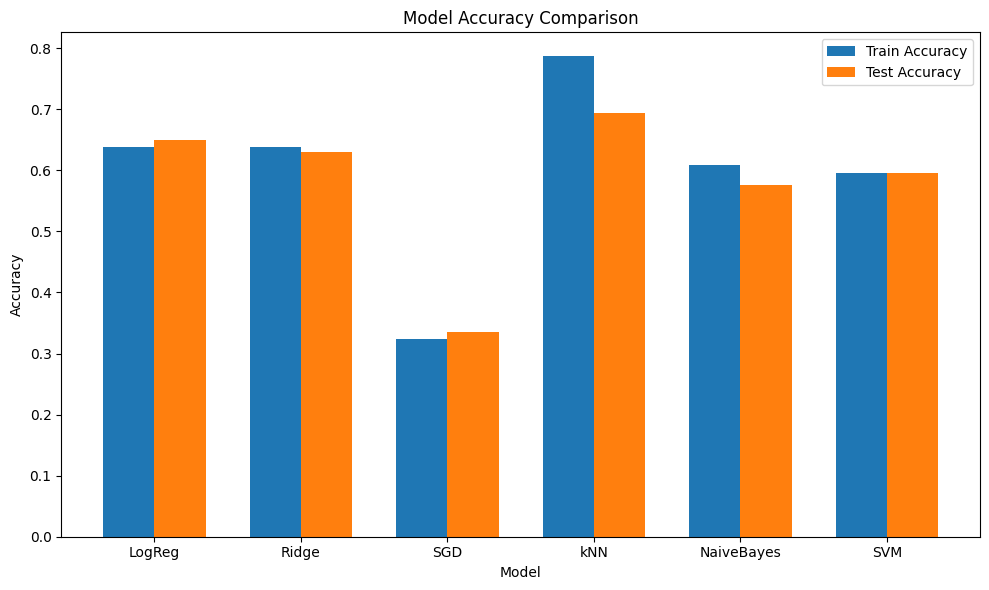

In [78]:
import matplotlib.pyplot as plt
import numpy as np

index = np.arange(len(names))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(index, train_accs, bar_width, label='Train Accuracy')
plt.bar(index + bar_width, test_accs, bar_width, label='Test Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(index + bar_width / 2, names)
plt.legend()

plt.tight_layout()
plt.show()


Comment on the accuracies that you've achieved on training these models on this dataset. Comment on the parameters you used to increase the accuracies. If you dont find an increase, you may suggest any better algorithms that work best on this data. Make sure you train and test these models on the dataset in the place for code above.

`ANSWER:`  Logistic Regression and Ridge both have accuraciess around 64% and SVM having an accuracy around 60% how ever the bestassucarcy would have to be kNN with a 79% accuracy on the training set and 69% accuracy on the test set.




<div id="feedback"></div>

## Feedback (3 point)

Did you enjoy the lab? 

Please take time to answer the following feedback qustions to help us further improve these labs! Your feedback is crucial to making these labs more useful!
    


* How do you rate the overall experience in this lab? (5 likert scale. i.e., 1 - poor ... 5 - amazing)  
Why do you think so? What was most/least useful?



`ANSWER` 5

* What did you find difficult about the lab? Were there any TODOs that were unclear? If so, what specfically did not make sense about it?



`ANSWER` N/A

* Which concepts, if any, within the lab do you feel could use more explanation?

`ANSWER` N/A